## 多项式回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)

In [3]:
y = 0.5 * x **2 + x + 2 + np.random.normal(0,1,size=100)

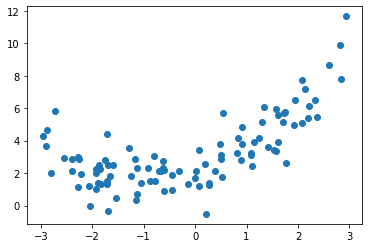

In [4]:
plt.scatter(x,y)
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
y_predict = lin_reg.predict(X)

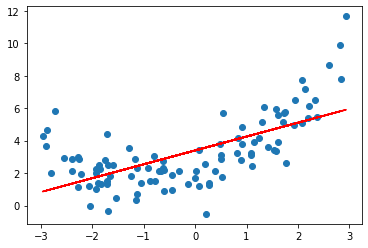

In [7]:
plt.scatter(x,y)
plt.plot(x,y_predict,color='r')
plt.show()

### 解决方案，添加一个特征

In [8]:
(X ** 2).shape

(100, 1)

In [9]:
X2 = np.hstack([X,X**2])

In [10]:
X2.shape

(100, 2)

In [11]:
lin_reg2 = LinearRegression()

lin_reg2.fit(X2,y)
y_predict2 = lin_reg2.predict(X2)

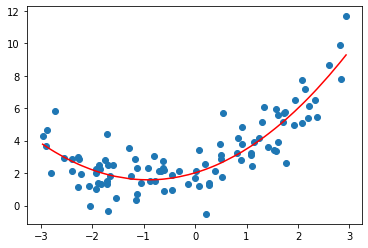

In [12]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color='r')
plt.show()

In [13]:
lin_reg2.coef_

array([0.94804894, 0.52034127])

In [14]:
lin_reg2.intercept_

2.015830741573872

## sklearn 中的多项式回归和Pipeline

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
poly = PolynomialFeatures(degree = 2)
poly.fit(X)

X2 = poly.transform(X)

In [17]:
X2.shape

(100, 3)

In [18]:
X2[:5,:]

array([[ 1.        ,  2.0874455 ,  4.35742871],
       [ 1.        ,  1.42518393,  2.03114925],
       [ 1.        , -0.44202864,  0.19538932],
       [ 1.        ,  0.20795281,  0.04324437],
       [ 1.        ,  2.13943659,  4.57718892]])

In [19]:
X[:5,:]

array([[ 2.0874455 ],
       [ 1.42518393],
       [-0.44202864],
       [ 0.20795281],
       [ 2.13943659]])

In [20]:
lin_reg3 = LinearRegression()

lin_reg3.fit(X2,y)
y_predict3 = lin_reg3.predict(X2)


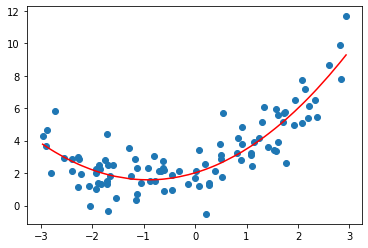

In [21]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color='r')
plt.show()

In [22]:
lin_reg3.coef_

array([0.        , 0.94804894, 0.52034127])

In [23]:
lin_reg3.intercept_

2.0158307415738723

### 关于PolynomialFeatures

In [24]:

X = np.arange(1,11).reshape(-1,2)

In [25]:
X.shape

(5, 2)

In [26]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [27]:
poly = PolynomialFeatures(degree = 2)

poly.fit(X)
X2 = poly.transform(X)

In [28]:
X2.shape

(5, 6)

In [29]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

In [30]:
poly = PolynomialFeatures(degree = 3)

poly.fit(X)
X3 = poly.transform(X)

In [31]:
X3.shape

(5, 10)

In [32]:
X3

array([[   1.,    1.,    2.,    1.,    2.,    4.,    1.,    2.,    4.,
           8.],
       [   1.,    3.,    4.,    9.,   12.,   16.,   27.,   36.,   48.,
          64.],
       [   1.,    5.,    6.,   25.,   30.,   36.,  125.,  150.,  180.,
         216.],
       [   1.,    7.,    8.,   49.,   56.,   64.,  343.,  392.,  448.,
         512.],
       [   1.,    9.,   10.,   81.,   90.,  100.,  729.,  810.,  900.,
        1000.]])

### Pipeline (处理+归一+回归 多步合一）

In [33]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x **2 + x + 2 + np.random.normal(0,1,size=100)

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [35]:
poly_reg = Pipeline([
    ("poly",PolynomialFeatures(degree=2)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
])

poly_reg.fit(X,y)
y_predict = poly_reg.predict(X)

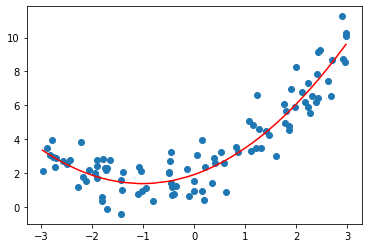

In [36]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')
plt.show()